# Problem 3-3: Kleinberg Network Model
Submission from Maria Kagkeli, Maria Regina Lily, Mihai Verzan

In [1]:
import igraph as ig
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean


## 1. Generate Kleinberg Random Network

In [2]:
def point_2D(X, l):
    x_0 = int(X/l)
    x_1 = X - x_0*l
    return (x_0,x_1)

def kleinberg(l,a):
    #create lattice netwrok with l^2 nodes
    G = ig.Graph.Lattice([l,l], circular=False)
    
    #try to add link for every node x
    for x in range(l*l):
        
        #create a list of all possible target nodes 
        non_x = [i for i in range(0,l*l)]
        del(non_x[x])
        
        #convert x to 2D points so that we can calculate the euclidean distance
        point_x = point_2D(x,l)
        points_y = [point_2D(i,l) for i in non_x ]      
         
        #calculate probability that node x is linked with the target nodes y
        #formula given by the question
        dist = np.array([euclidean(point_x, point_y) for point_y in points_y])
        C_x = np.sum(dist**(-a))
        P_x = (1/C_x)*(dist**(-a))
        
        #create a weighted list of choice, weight of node y is p_x(y)
        choice = []
        for i in range(len(non_x)): 
            weight = int(P_x[i]*10000)
            choice = choice + [non_x[i]]*(weight) 
            
        #choose a random target node y from choice
        y = random.choice(choice)
            
        #add link (x,y) to graph if it doesn't already exist
        existing_edges = G.get_edgelist()
        if (x,y) not in existing_edges and (y,x) not in existing_edges:
            #print("add new link {}".format((x,y)))
            G.add_edge(x,y)
        
    return G

### Set up values for experiment

In [ ]:
L = [ 2,5,7,10,12,15,18,20,25,28,30,32 ]
N = [l*l for l in L]

G_0 = [kleinberg(l,0) for l in L]
G_1 = [kleinberg(l,1) for l in L]
G_2 = [kleinberg(l,2) for l in L]
G_3 = [kleinberg(l,3) for l in L]
G_4 = [kleinberg(l,4) for l in L]
G_5 = [kleinberg(l,5) for l in L]


## 2. Average Shortest Path Length

In [11]:
avg_dist0 = [np.sum(G_0[i].shortest_paths())/L[i]**4 for i in range(len(L))]
avg_dist1 = [np.sum(G_1[i].shortest_paths())/L[i]**4 for i in range(len(L))]
avg_dist2 = [np.sum(G_2[i].shortest_paths())/L[i]**4 for i in range(len(L))]
avg_dist3 = [np.sum(G_3[i].shortest_paths())/L[i]**4 for i in range(len(L))]
avg_dist4 = [np.sum(G_4[i].shortest_paths())/L[i]**4 for i in range(len(L))]
avg_dist5 = [np.sum(G_5[i].shortest_paths())/L[i]**4 for i in range(len(L))]

CPU times: user 1.27 s, sys: 43.3 ms, total: 1.32 s
Wall time: 2.54 s
CPU times: user 1.31 s, sys: 15.8 ms, total: 1.32 s
Wall time: 2.73 s
CPU times: user 1.23 s, sys: 35.4 ms, total: 1.27 s
Wall time: 1.4 s
CPU times: user 1.24 s, sys: 15.8 ms, total: 1.26 s
Wall time: 2.11 s
CPU times: user 1.21 s, sys: 34.2 ms, total: 1.25 s
Wall time: 2.66 s
CPU times: user 1.19 s, sys: 15.4 ms, total: 1.21 s
Wall time: 1.81 s


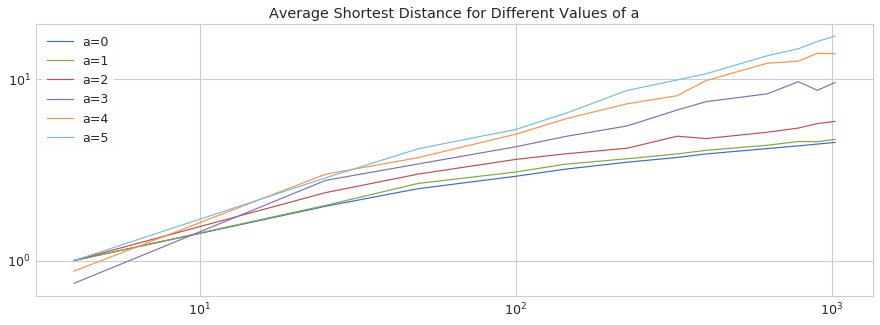

In [12]:
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
fig.set_figwidth(15)
fig.set_figheight(5)

plt.plot(N, avg_dist0)
plt.plot(N, avg_dist1)
plt.plot(N, avg_dist2)
plt.plot(N, avg_dist3)
plt.plot(N, avg_dist4)
plt.plot(N, avg_dist5)

ax.legend(["a=0","a=1", "a=2", "a=3", "a=4", "a=5"])
plt.title("Average Shortest Distance for Different Values of a")
plt.show()

## 4. Average Local Clustering Coefficient

In [13]:
avg_lcc0 = [g.transitivity_avglocal_undirected() for g in G_0]
avg_lcc1 = [g.transitivity_avglocal_undirected() for g in G_1] 
avg_lcc2 = [g.transitivity_avglocal_undirected() for g in G_2]
avg_lcc3 = [g.transitivity_avglocal_undirected() for g in G_3]
avg_lcc4 = [g.transitivity_avglocal_undirected() for g in G_4]
avg_lcc5 = [g.transitivity_avglocal_undirected() for g in G_5]


CPU times: user 7.72 ms, sys: 0 ns, total: 7.72 ms
Wall time: 275 ms
CPU times: user 6.19 ms, sys: 9 µs, total: 6.2 ms
Wall time: 6.4 ms
CPU times: user 5.81 ms, sys: 0 ns, total: 5.81 ms
Wall time: 6.25 ms
CPU times: user 5.57 ms, sys: 0 ns, total: 5.57 ms
Wall time: 9.4 ms
CPU times: user 5.32 ms, sys: 0 ns, total: 5.32 ms
Wall time: 11.7 ms
CPU times: user 4.85 ms, sys: 0 ns, total: 4.85 ms
Wall time: 8.88 ms


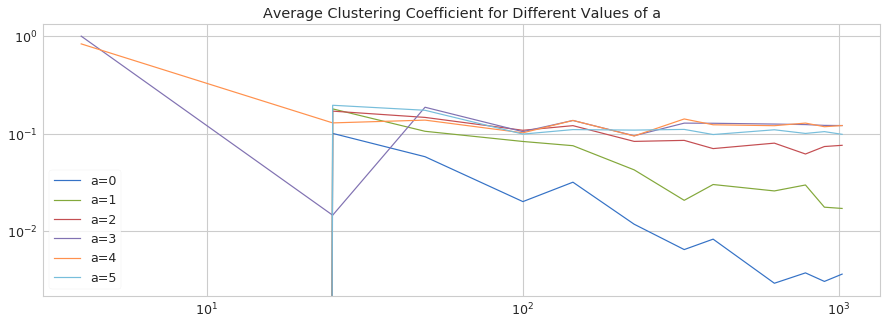

In [17]:
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
fig.set_figwidth(15)
fig.set_figheight(5)

plt.plot(N, avg_lcc0)
plt.plot(N, avg_lcc1)
plt.plot(N, avg_lcc2)
plt.plot(N, avg_lcc3)
plt.plot(N, avg_lcc4)
plt.plot(N, avg_lcc5)

ax.legend(["a=0","a=1", "a=2", "a=3", "a=4", "a=5"])
plt.title("Average Clustering Coefficient for Different Values of a")
plt.show()